<a href="https://colab.research.google.com/github/seetaram-oruganti/AMAZED/blob/master/MLP_with_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import imblearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.shape

(284807, 31)

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
df_fraud=df[df['Class']==1]
df_non_fraud=df[df['Class']==0]

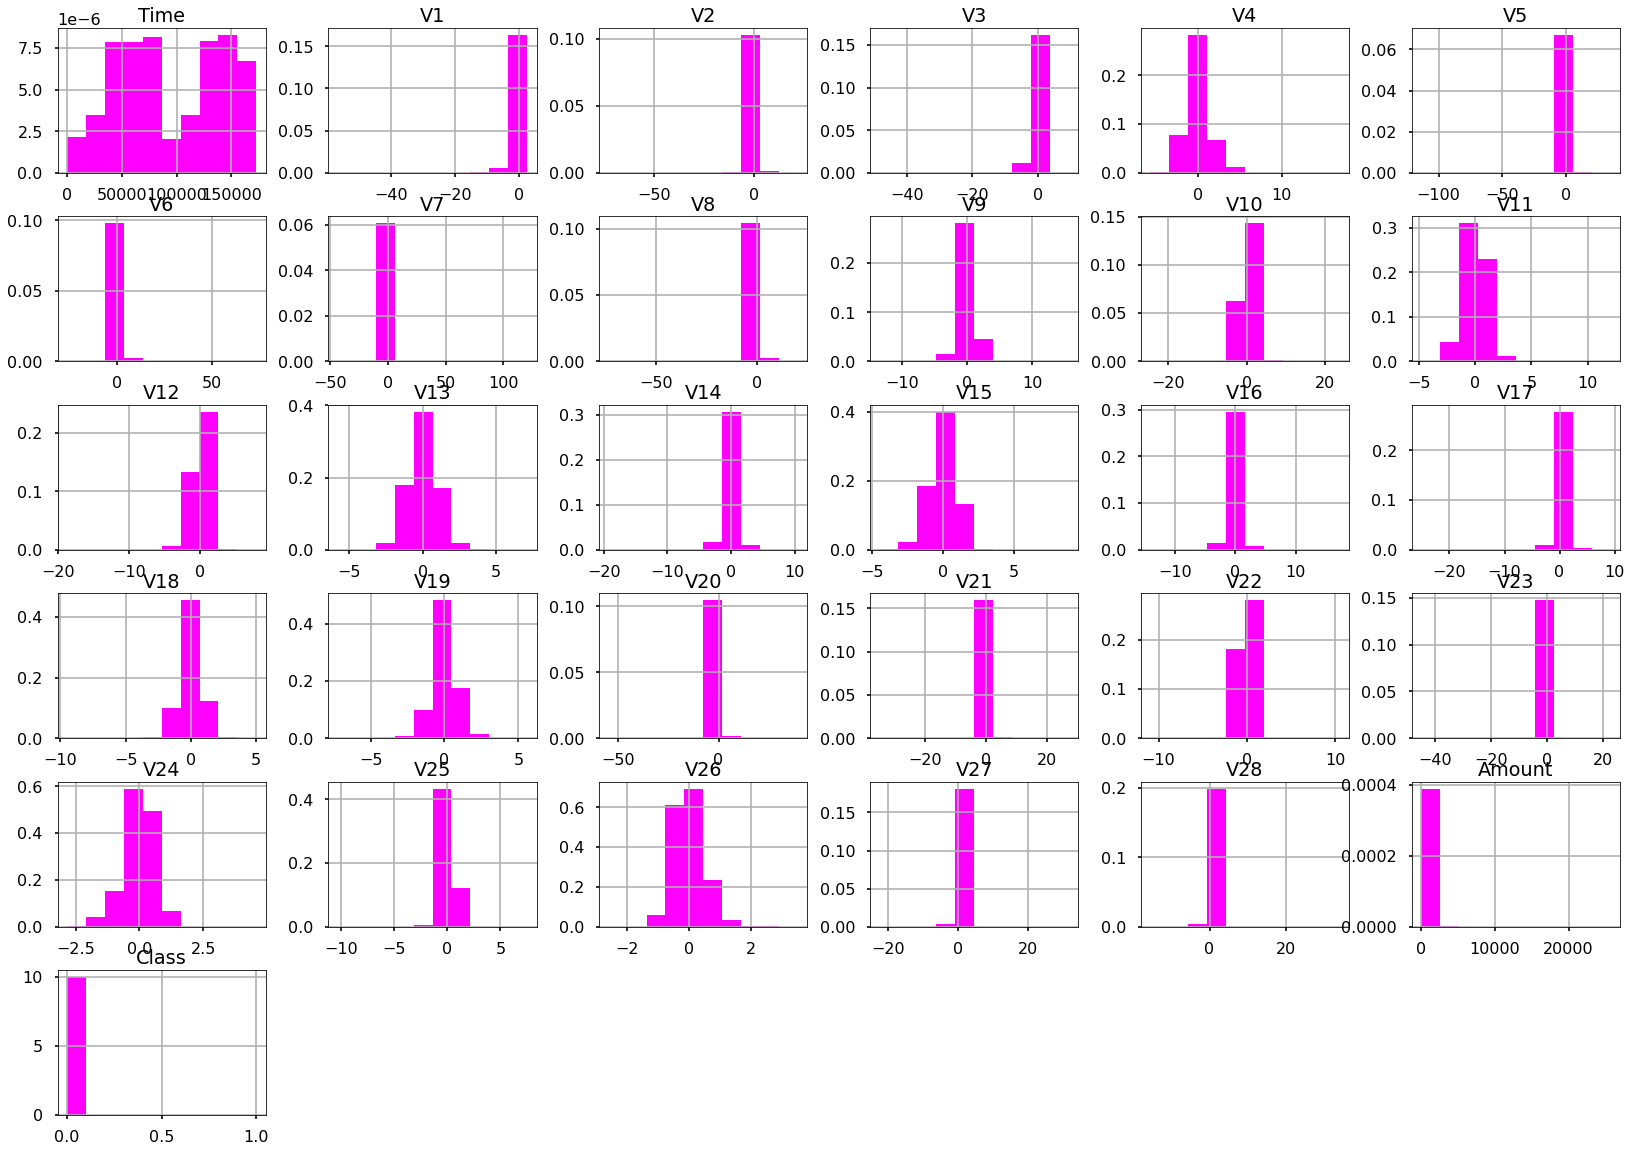

In [ ]:
plt.style.use("seaborn-poster")
df.hist(figsize=(28,20),density=True,color="magenta")
plt.show()

In [ ]:
df3=df_non_fraud.append(df_fraud)
df3.shape

(284807, 31)

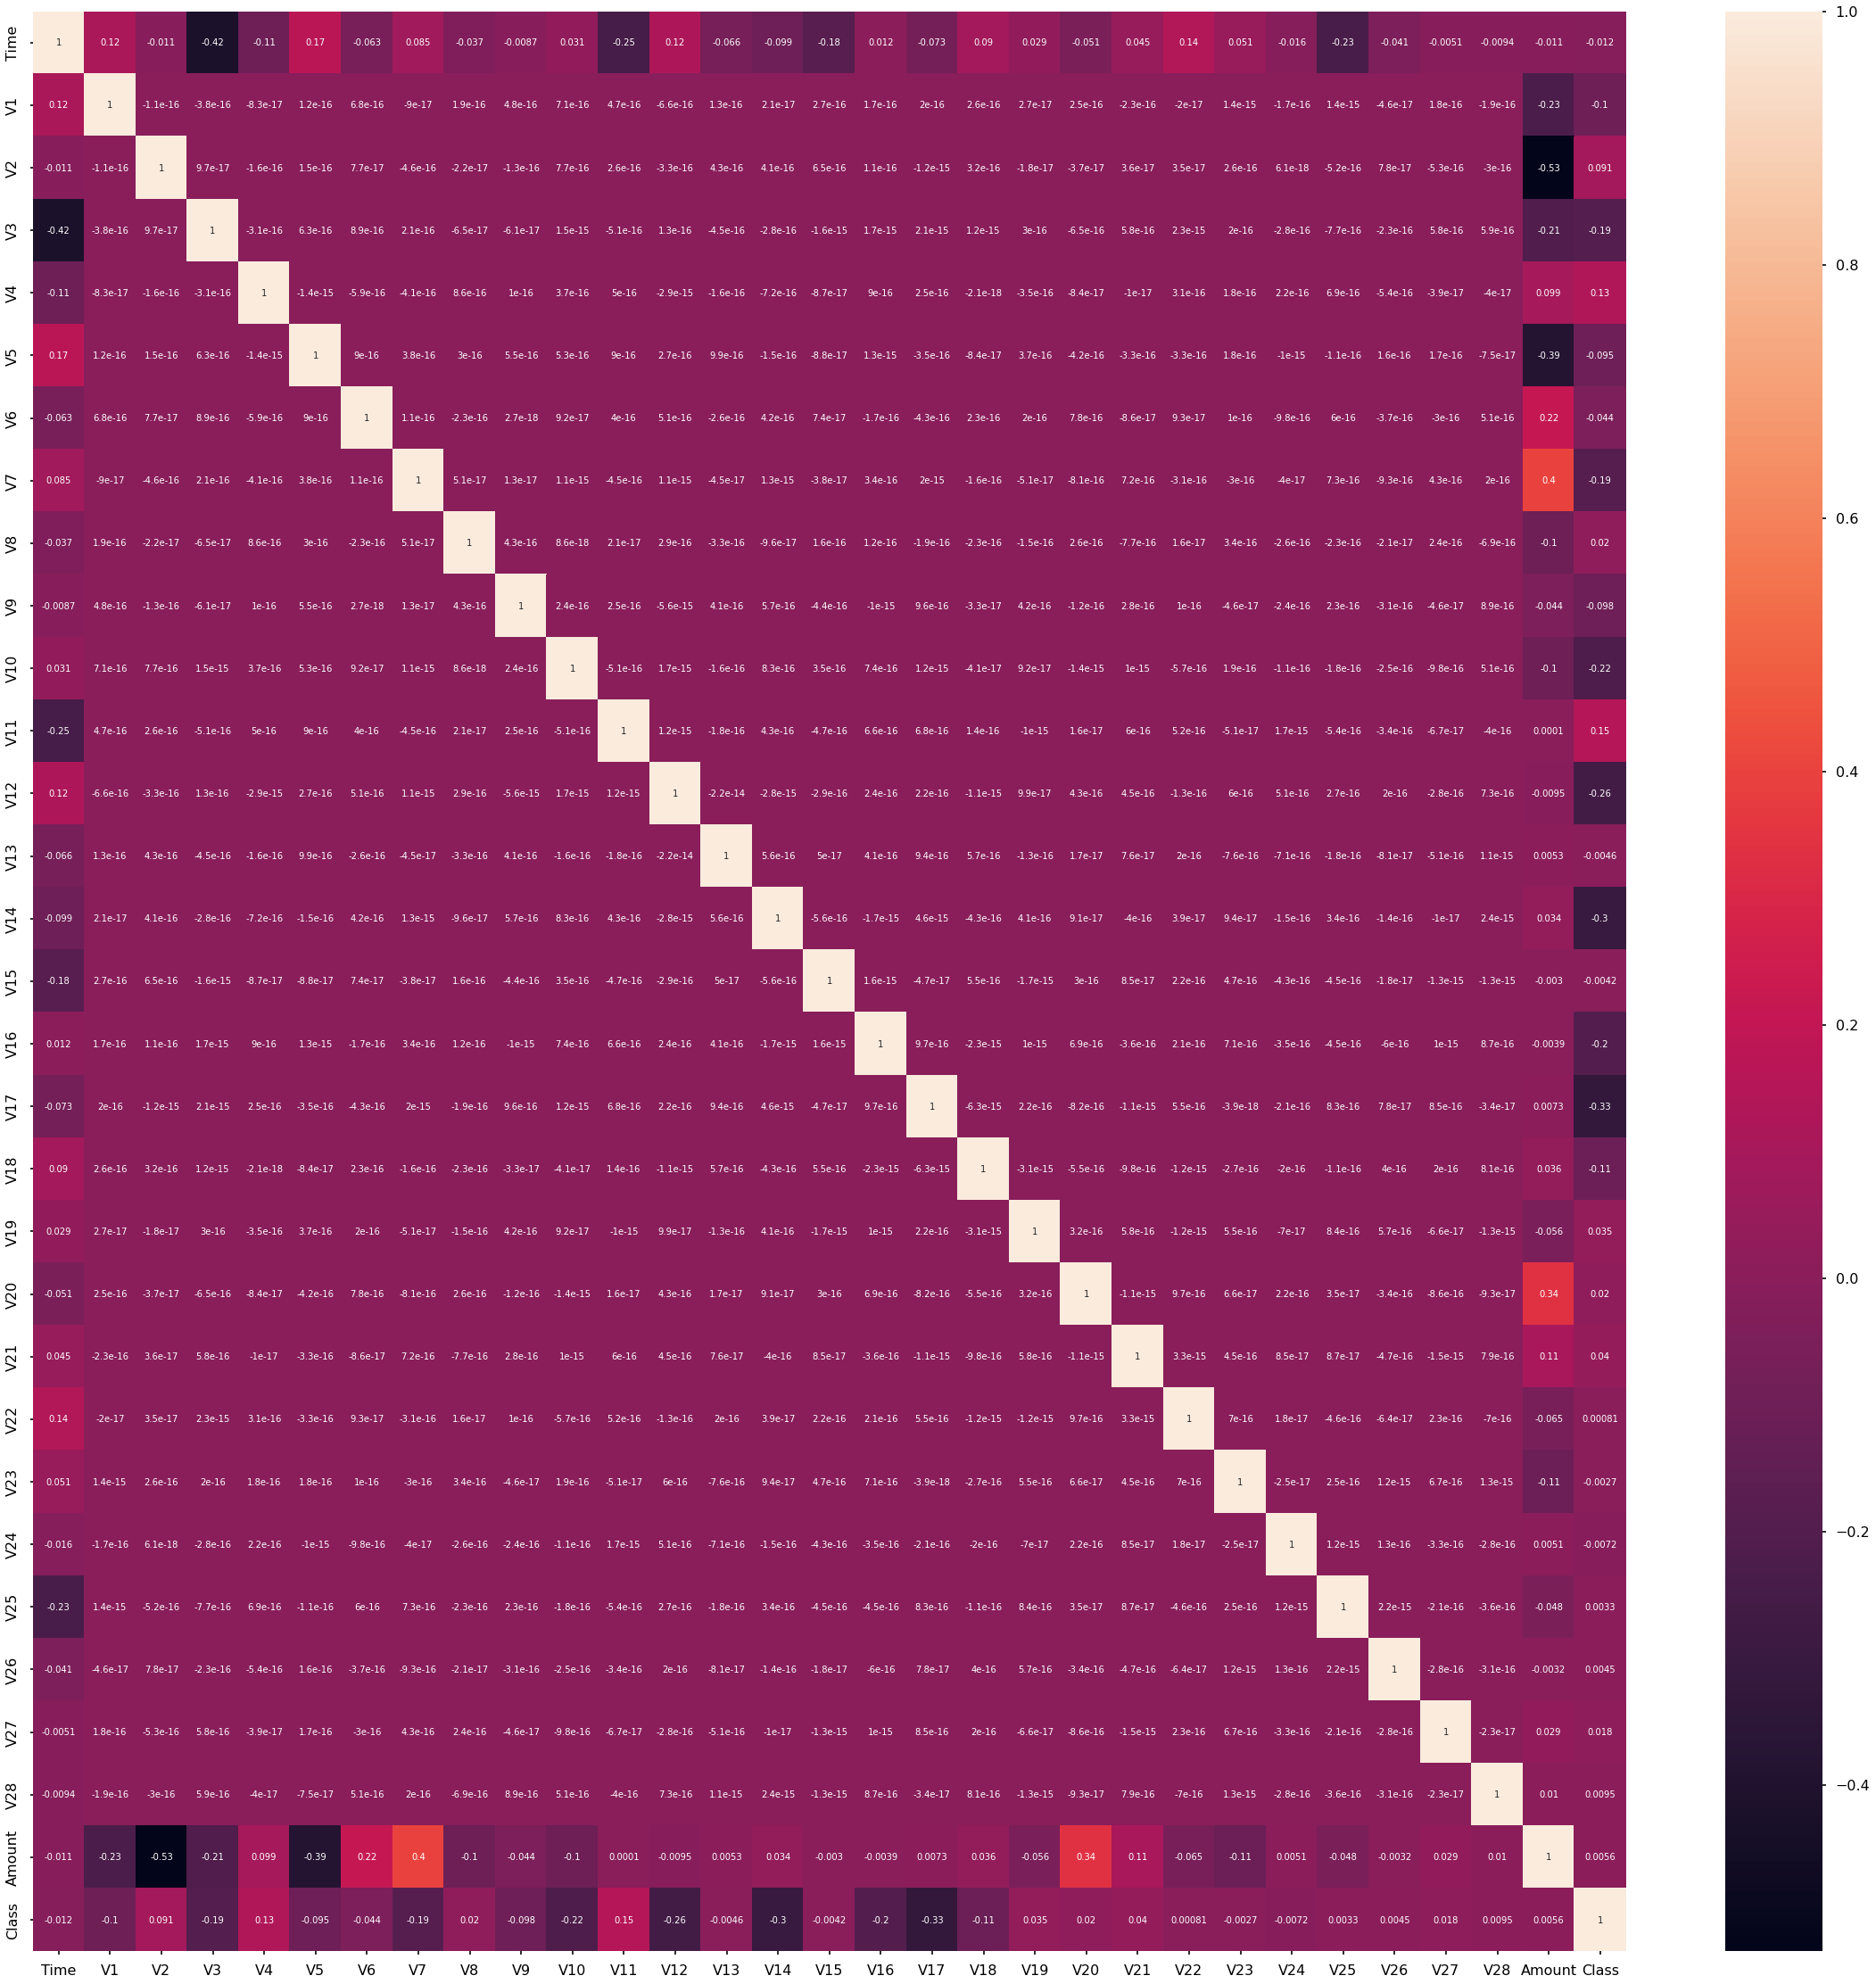

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(df3.corr(),annot=True) 

In [ ]:
df3.shape

(284807, 31)

# **Models**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
X = df3.iloc[:, :-1]
y = df3.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape

(227845, 30)

In [ ]:
y_train.shape

(227845,)

In [ ]:
y_test

183851    0
255918    0
245196    0
64085     0
11524     0
         ..
237209    0
127333    0
208896    0
263802    0
246670    0
Name: Class, Length: 56962, dtype: int64

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)   

LogisticRegression()

In [ ]:
print(classifier.intercept_, classifier.coef_)

[-1.73623811] [[-8.42490438e-05  3.84227836e-01 -7.91458858e-01 -7.89344764e-01
   1.83827399e-01  2.04283391e-01 -1.07093821e-01  4.10085465e-01
  -4.92700919e-01 -5.57967087e-01 -3.48918805e-01 -2.49591185e-01
   3.29119361e-02 -4.19948853e-01 -1.03793906e+00 -4.02143583e-01
  -4.00929100e-01 -6.49863409e-01 -1.12444560e-02  8.45835158e-02
   3.02242911e-02  2.90283290e-01  3.78734351e-01  4.88519937e-02
  -3.26256774e-02 -3.71711594e-01  6.94579632e-02 -7.23740371e-02
   6.90541207e-02 -9.58090794e-03]]


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9989203186376704


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_b = classifier.predict(X_test)

In [ ]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.71      0.56      0.63        94

    accuracy                           1.00     56962
   macro avg       0.85      0.78      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)


In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

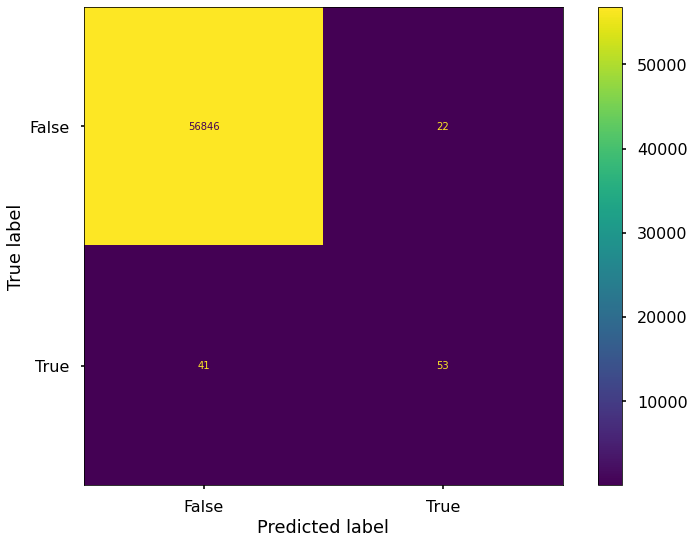

In [ ]:
cm_display.plot()
plt.show()

# **KNN**

In [ ]:
classifier=KNeighborsClassifier()

In [ ]:
classifier.fit(X_train, y_train)   

KNeighborsClassifier()

In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))


Accuracy from sk-learn: 0.9984155895455243


In [ ]:
pred_b = classifier.predict(X_test)

In [ ]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       1.00      0.06      0.12        94

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.56     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

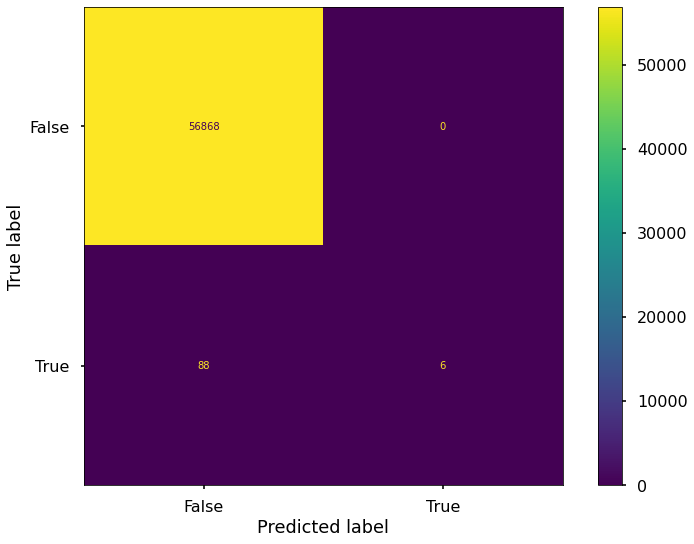

In [ ]:
cm_display.plot()
plt.show()

# **Support Vector Machine**

In [ ]:
classifier=SVC()

In [ ]:
classifier.fit(X_train, y_train)   

SVC()

In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9982531984463122


In [ ]:
pred_b = classifier.predict(X_test)

In [ ]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.00      0.00      0.00        94

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

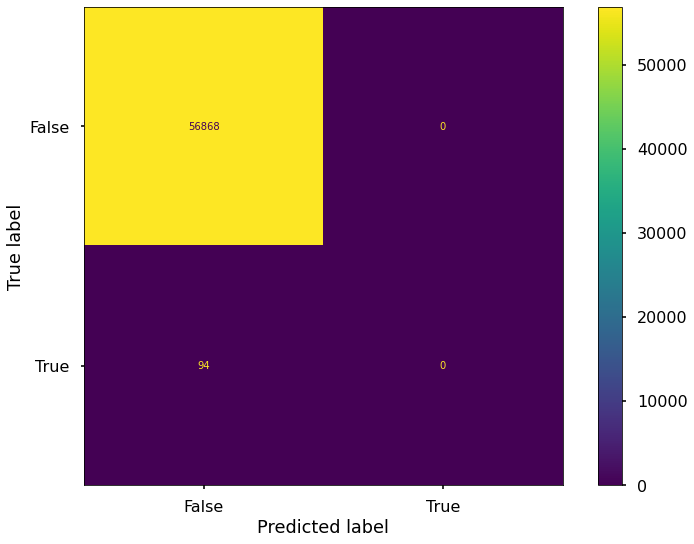

In [ ]:
cm_display.plot()
plt.show()

# **Decision Tree Classifier**

In [ ]:
classifier=DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


In [ ]:
print('Accuracy from DecisionTreeClassifier for training : 0.89')

Accuracy from DecisionTreeClassifier for training : 0.89


In [ ]:
pred_b = classifier.predict(X_test)

In [ ]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.71      0.69      0.70        94

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [ ]:
cm_display.plot()
plt.show()